# Projet Numérique 3 : câble sous-marin


## Questions théoriques

1) Le théorème du cours qui nous autorsie à estimer l'espérance conditionnelle par la moyenne empririque des simulations conditionnelles et la loi des grands nombres que l'on peut appliquer ici car les simulations de la profondeur de câble réalisées sont indépedantes, de même loi et intégrables.

2) Pour trouver la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation, on utilise les résultats du cours Probabilite IV sur les lois conditionnelles pour les vecteurs Gaussiens à densité.

Notons $Z_{i}$ le vecteur des composantes inconnues

Notons $Z_{c}$ le vecteur des composantes connues (car observées) 

On cherche donc $f_{Z_{i}, Z_{c}=z_{c}}$


$
\begin{aligned}
\text {Notons } C_{Z_{i}} &=\operatorname{Cov}\left(Z_{i}, Z_{i}\right) \\
C_{Z_{c}} &=\operatorname{Cov}\left(Z_{c}, Z_{c}\right) \\
C_{Z_{i}, Z_{c}} &=\operatorname{Cov}\left(Z_{i}, Z_{c}\right)\\
\end{aligned}
$


$\mathrm{CS}_{Z_{i}}$ le complément de Schur de la matrice $C_{Z_{i}}$ 

Alors on sait que:

$$
\begin{aligned}
&f_{Z_{i} | Z_{c} = z_{c}}\left(z_{i}\right)=\frac{1}{(2 \pi)^{k / 2} \sqrt{\operatorname{det}\left(CS_{Z_{i}}\right)}} \exp \left(-\frac{1}{2}\left(z_{i}-\psi\left(z_{c}\right)\right)^{t} \operatorname{CS}_{Z_{i}}^{-1}\left(z_{i}-\psi\left(z_{c}\right)\right)\right)\\
\end{aligned}
$$

$
\begin{aligned}
&avec :\\
&CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}\\
&\psi\left(z_{c}\right)=m_{Z_{i} | Z_{c}=z_{c}}=m_{Z_{i}} - C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1}\left(Z_{c}-m_{Z_{c}}\right)
\end{aligned}
$

3)
Soit Y = ($Y_{1}$ ... $Y_{p}$) un vecteur de composantes gausiennes indépendantes, toutes d'espérance nulle et de variance 1.

Soit R une matrice p x p, soit m un vecteur de taille p.

Notons $\phi_{X}$, la fonction caractéristique de X, vecteur valeurs dans $\mathbb{R}^{p}$.

Posons $Z=m+RY$

Alors, par propriété de transformation linéaire : 
$$
\phi_{Z}=\phi_{m+RY}
$$
$$
\phi_{m+RY}(u)=\exp (i <u, m>) \phi_{Y}\left(R^{t} u\right) \quad \forall u \in \mathbb{R}^{p}
$$

Or on sait que la fonction caractéristique $\phi_{Z}$ caractérise la loi du vecteur aléatoire Z, ce qui donne le résultat attendu.

4) D'après le cours de Probabilités IV, la variable aléatoire $Z_{i}|Z_{c} = z_{c}$ suit une loi gaussienne d'espérance $\psi\left(z_{c}\right)$ et de matrice de covariance $CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}$.

Notons $Z_{i}^{j}$ la $j^{ème}$ composante du vecteur $Z$. Elle suit une loi gaussienne d'espérance $m_{j} = \psi\left(z_{c}\right)^{j}$ et de variance $\sigma_{j}^{2} = CS_{Z_{i}}(j,j)$.

On peut donc utiliser la méthode de **Box-Muller** pour simuler chacune des composantes du vecteur $Z_{i}$.

Notons $U$ et $V$ deux variables aléatoires indépendantes de loi uniforme sur $]0,1[$.
Alors la variable aléatoire $X = \sqrt { -2\ln(U)}\cos(2\pi V)$ suit une loi normale centrée réduite.

Par combinaison linéaire de variables aléatoires gaussiennes indépendantes, $\sigma_{j}X + m_{j}$ suit une loi normale d'espérance $m_{j}$ et de variance $\sigma_{j}^{2}$ qui permet de simuler $Z_{i}^{j}$ .

## Questions informatiques

#### Préambule

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### Discrétisation

In [8]:
A=0
B=500
N=101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
dicretization = discretization_indexes*Delta

#### Paramètres du modèle

In [9]:
mu = -5
a = 50
sigma2 = 12

#### Données

In [10]:
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

#### Indices des composantes correspondant aux observations et aux composantes non observées

In [11]:
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

### Question 1

#### Pour un couple de points

In [12]:
def cov(h, a, sigma2):
    return sigma2*np.exp(-h/a)
    

#### Pour une matrice de covariance

In [13]:
def cov_mat(H, a, sigma2): # H est la matrice de distances
    n, m = np.shape(H)
    C = np.zeros((n,m))
    for i in range (n):
        for j in range (m):
            C[i][j] = cov(H[i][j], a, sigma2)
    return C
    

### Question 2

In [14]:
def mat_distance(N, Delta):
    H = np.zeros((N, N))
    for i in range (N):
        for j in range (N):
            H[i][j] = abs(i-j)*Delta
    return H

In [15]:
mat_distance(N, Delta)

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

### Question 3

In [16]:
def cov_vecteur(N, Delta, a, sigma2):
    H = mat_distance(N, Delta)
    return cov_mat(H, a, sigma2)

### Question 4

#### Matrice de covariance entre les observations

In [24]:
def cov_known(observation_indexes, N, Delta, a, sigma2):
    C = cov_vecteur(N, Delta, a, sigma2)
    k = len(observation_indexes)
    Cov_k = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            Cov_k[i][j] = C[observation_indexes[i]][observation_indexes[j]]
    return Cov_k

#### Matrice de covariance entre les observations et les inconnues

In [18]:
def cov_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2):
    C = cov_vecteur(N, Delta, a, sigma2)
    u = len(unknown_indexes)
    k = len(observation_indexes)
    Cov_u_k = np.zeros((u, k))
    for i in range(u):
        for j in range(k):
            Cov_u_k[i][j] = C[unknown_indexes[i]][observation_indexes[j]]
    return Cov_u_k

#### Matrice de covariance entre les inconnues

In [19]:
def cov_unknown(unknown_indexes, N, Delta, a, sigma2):
    C = cov_vecteur(N, Delta, a, sigma2)
    u = len(unknown_indexes)
    Cov_u = np.zeros((u, u))
    for i in range(u):
        for j in range(u):
            Cov_u[i][j] = C[unknown_indexes[i]][unknown_indexes[j]]
    return Cov_u

### Question 5

D'après les résultats du cours Probabilite IV sur les lois conditionnelles pour les vecteurs Gaussiens à densité cités précédemment : 

$E\left(Z_{i} | Z_{c}\right)=\phi\left(Z_{c}\right)=m_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1}\left(Z_{c}-m_{Z_{c}}\right)$


In [20]:
def espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    Cov_u_k = cov_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    C_k_inv = np.linalg.inv(cov_known(observation_indexes, N, Delta, a, sigma2))
    u = len(unknown_indexes)
    k = len(observation_indexes)
    m_u = np.array([mu]*u)
    m_k = np.array([mu]*k)
    return np.array(m_u + np.dot(Cov_u_k, np.dot(C_k_inv, (depth-m_k))))

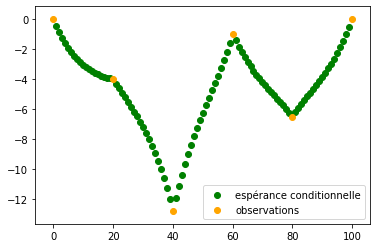

In [57]:
E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
plt.scatter(unknown_indexes,E,label="espérance conditionnelle",color="green")
plt.scatter(observation_indexes,depth,label="observations",color="orange")
plt.legend()
plt.show()

### Question 6

On a vu dans le cours de Probabilités IV que la variable aléatoire $Z_{i}|Z_{c} = z_{c}$ a pour matrice de covariance $CS_{Z_{i}}=C_{Z_{i}}-C_{Z_{i}, Z_{c}} C_{Z_{c}}^{-1} C_{Z_{c}, Z_{i}}$.




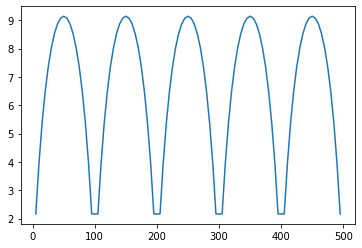

In [22]:
def variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2):
    C_k = cov_known(observation_indexes, N, Delta, a, sigma2)
    C_u = cov_unknown(unknown_indexes, N, Delta, a, sigma2)
    C_uk = cov_unknown_and_known(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    V = C_u - np.dot(np.dot(C_uk, np.linalg.inv(C_k)),np.transpose(C_uk))
    return(V)

    
V = variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2)

X = [i*Delta for i in unknown_indexes]
Y = [V[i][i] for i in range(len(V[0]))]
plt.plot(X,Y)
plt.show()

### Question 7

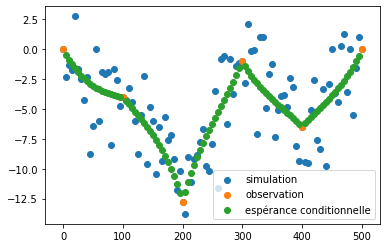

In [55]:
def simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    
    E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
    V = variance_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2)
    
    simulation = []
    compteur_observation=0
    compteur_simulation=0
    
    for i in range(N):
        if i in unknown_indexes:
            A = np.random.random()
            B = np.random.random()
            X = np.sqrt(-2*np.log(A))*np.cos(2*np.pi*B)

            m = E[compteur_simulation]
            sigma = np.sqrt(V[compteur_simulation][compteur_simulation])

            simulation.append(sigma*X+m)
            compteur_simulation+=1
        else:
            simulation.append(depth[compteur_observation])
            compteur_observation+=1
    return (simulation)
        
simulation = simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)      

plt.scatter(np.array(discretization_indexes)*5,simulation,label="simulation")
plt.scatter(np.array(observation_indexes)*5,depth,label="observation")
plt.scatter(np.array(unknown_indexes)*5,E,label="espérance conditionnelle")
plt.legend()
plt.show()

### Question 8

In [38]:
def longueur_cable(Z, Delta):
    l = 0
    for i in range(N-1):
        l += np.sqrt(Delta**2 + (Z[i+1]-Z[i])**2)
    return l

### Question 9

In [69]:
def longueur_moy(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu, nbr):
    l_moy = 0
    for i in range(nbr):
        Z = simulation_conditionnelle(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
        l_moy += longueur_cable(Z, Delta)
    return l_moy/nbr

def moy_longueur(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu):
    E = espérance_u_sachant_k(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu)
    liste=[]
    compteur_observation,compteur_esperance=0,0
    for i in range(N):
        if i in unknown_indexes:
            liste.append(E[compteur_esperance])
            compteur_esperance+=1
            
        else:
            liste.append(depth[compteur_observation])
            compteur_observation+=1
    l = 0
    for i in range(len(liste)-1):
        l += np.sqrt(Delta**2 + (liste[i+1]-liste[i])**2)
    return l


In [58]:
longueur_moy(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu, 100)

601.1725498948504

In [70]:
print(moy_longueur(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu))

501.6468416918411


 ### Question 10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


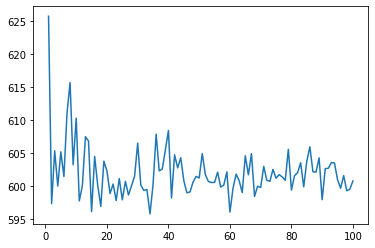

In [71]:
X1 = np.arange(1,101)
Y1=[]

for i in X1:
    Y1.append(longueur_moy(observation_indexes, unknown_indexes, N, Delta, a, sigma2, mu, i))
    
plt.plot(X1,Y1)
plt.xlabel("Nombre de simulations")
plt.ylabel("Moyennes des longueurs de cable")
plt.show()

 ### Question 11

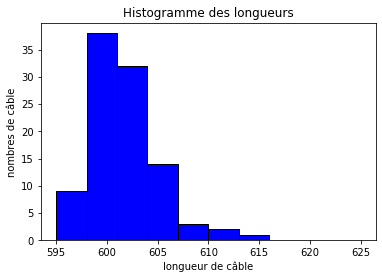

In [79]:

del Y1[0]
        
plt.hist(Y1, range = (int(min(Y1)), int(max(Y1))), bins = 10, color = 'blue',
            edgecolor = 'black')
plt.xlabel('longueur de câble')
plt.ylabel('nombres de câble')
plt.title('Histogramme des longueurs')
plt.show()

